In [108]:
#Import Dependencies
import pandas as pd
import string
import matplotlib.pyplot as plt

In [109]:
#Read in data
data = pd.read_csv('Data/manually_cleaned/train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [110]:
#Drop location from data
data.drop('location', axis=1, inplace=True)
data.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [111]:
#Fill NaN values to make them iterable for later
data.fillna(value='none', inplace=True)
data.head()

,id,keyword,text,target
0,1,none,Our Deeds are the Reason of this #earthquake M...,1
1,4,none,Forest fire near La Ronge Sask. Canada,1
2,5,none,All residents asked to shelter in place are be...,1
3,6,none,"13,000 people receive #wildfires evacuation or...",1
4,7,none,Just got sent this photo from Ruby #Alaska as ...,1


In [112]:
#Add back spaces in keywords
keywords = data['keyword'].to_list()
clean_keywords = [word.replace('%20', ' ') for word in keywords]
clean_keywords[:5]

['none', 'none', 'none', 'none', 'none']

In [113]:
#Replace keyword column values with cleaned ones
data['keyword'] = clean_keywords
data.head()

,id,keyword,text,target
0,1,none,Our Deeds are the Reason of this #earthquake M...,1
1,4,none,Forest fire near La Ronge Sask. Canada,1
2,5,none,All residents asked to shelter in place are be...,1
3,6,none,"13,000 people receive #wildfires evacuation or...",1
4,7,none,Just got sent this photo from Ruby #Alaska as ...,1


In [114]:
#Set tweets to an iterable list for cleaning
tweets = data['text'].to_list()
#Dictionary of contractions for tweet cleaning
contractions = {
"<3": "love", 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
'im': "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"luv": "love",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"w/": "with",
"w/o": "without",
"wasn't": "was not",
"wat": "what",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"wit": "with",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

In [115]:
#Clean tweet text
clean_tweets = []
hashtags = []
urls = []
for tweet in tweets:
    words = tweet.split(" ")
    new_words = []
    url_count = 0
    hashtag_count = 0
    for word in words:
        word = word.lower()
        word = word.rstrip('\n')
        word = word.lstrip('\n')
        if "#" in word:
            hashtag_count +=1
            word = word[1:]
            strip_word = word.translate(str.maketrans('', '', string.punctuation))
            new_words.append(strip_word)
        elif 'http' in word or 'https' in word:
            url_count += 1
        elif word in contractions.keys():
            word = contractions[word]
            strip_word = word.translate(str.maketrans('', '', string.punctuation))
            new_words.append(strip_word)
        elif '@' in word:
            pass
        elif 'û' in word:
            pass
        else:
            new_word = []
            for letter in word:
                if letter in 'abcdefghijklmnopqrstuvwxyz0123456789':
                    new_word.append(letter)
            clean_word = "".join(new_word)
            strip_word = clean_word.translate(str.maketrans('', '', string.punctuation))
            new_words.append(strip_word)
    for word in new_words:
        if "û" in word:
            new_words.remove(word)
        elif " " == word:
            new_words.remove(word)
        elif word == "":
            new_words.remove(word)
        elif 'û' in word:
            new_words.remove(word)
    clean_tweet = " ".join(new_words)
    clean_tweets.append(clean_tweet)
    hashtags.append(hashtag_count)
    urls.append(url_count)
print(clean_tweets[:5])
print(hashtags[:5])
print(urls[:5])

['our deeds are the reason of this earthquake may allah forgive us all', 'forest fire near la ronge sask canada', 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected', '13000 people receive wildfires evacuation orders in california', 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school']
[1, 0, 0, 1, 2]
[0, 0, 0, 0, 0]


In [116]:
#Set new df
data['text'] = clean_tweets
data['hashtags'] = hashtags
data['urls'] = urls
data.head()

,id,keyword,text,target,hashtags,urls
0,1,none,our deeds are the reason of this earthquake ma...,1,1,0
1,4,none,forest fire near la ronge sask canada,1,0,0
2,5,none,all residents asked to shelter in place are be...,1,0,0
3,6,none,13000 people receive wildfires evacuation orde...,1,1,0
4,7,none,just got sent this photo from ruby alaska as s...,1,2,0


In [117]:
#Read to csvÂ‰Ã»Ã
data.to_csv('Data/manually_cleaned/train_ready.csv')

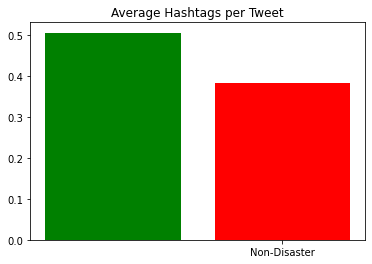

In [118]:
#Bar plot of average hastags by true or false
true = data.loc[data['target'] == 1]
false = data.loc[data['target'] == 0]
plt.bar(1, true['hashtags'].mean(), color='g', tick_label='Disaster')
plt.bar(2, false['hashtags'].mean(), color='r', tick_label='Non-Disaster')
plt.title('Average Hashtags per Tweet')
plt.show()